<h2>Case study 1: Objective : Predict salary of an employee using work experience</h2>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3>Acquire data</h3>

In [52]:
data=pd.read_csv(f"D:\MMW\SYMSc Comp Science 20-21 batch\DataSets for ML\work_salary.csv")
data

,Salary,WorkExperience
0,63.615,44
1,318.378,230
2,169.841,97
3,120.629,39
4,301.733,216
...,...,...
223,185.690,119
224,334.122,233
225,296.912,213
226,293.243,200


In [53]:
data.shape

(228, 2)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Salary          228 non-null    float64
 1   WorkExperience  228 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.7 KB


In [55]:
data.describe()

,Salary,WorkExperience
count,228.000000,228.000000
mean,202.606346,131.504386
std,81.715074,62.790786
min,32.277000,24.000000
25%,139.086250,77.750000
50%,199.262000,131.500000
75%,272.659750,185.250000
max,363.466000,240.000000


In [56]:
data.isnull().sum()

Salary            0
WorkExperience    0
dtype: int64

<h2>Visualization</h2>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F57BF30C8>,
      dtype=object)

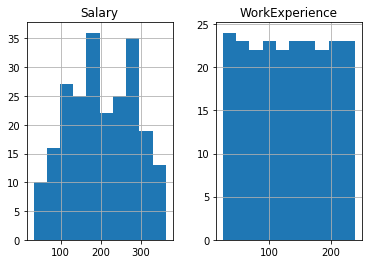

In [57]:
data.hist()

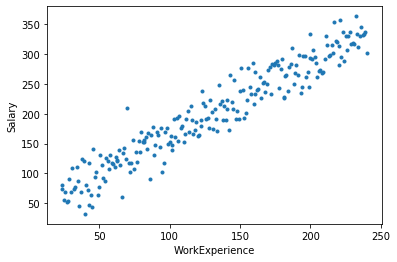

In [58]:
plt.scatter(data['WorkExperience'],data['Salary'],marker='.')
plt.xlabel('WorkExperience')
plt.ylabel('Salary')
plt.show()

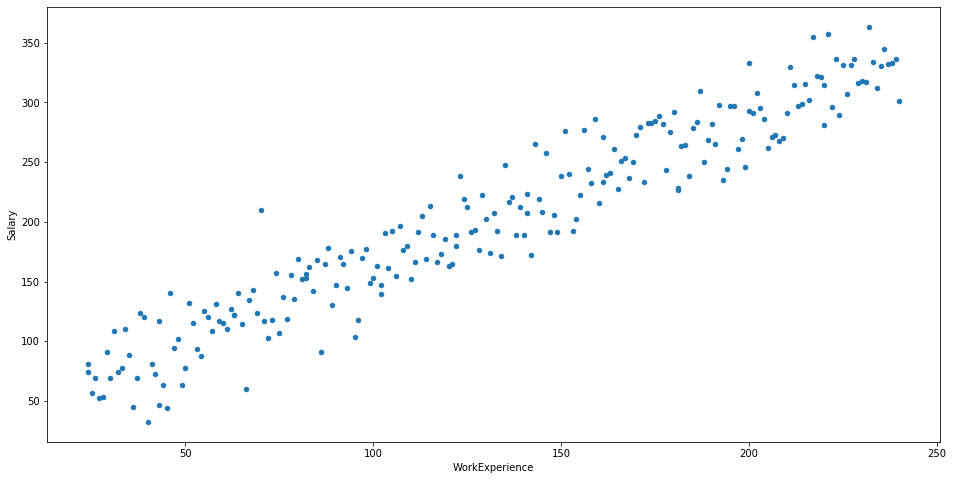

In [59]:
data.plot(kind='scatter',x='WorkExperience',y='Salary',figsize=(16,8))

In [60]:
data.corr()['Salary']

Salary            1.000000
WorkExperience    0.957556
Name: Salary, dtype: float64

In [61]:
X=data.drop('Salary',axis=1)
y=data['Salary']

In [62]:
X

,WorkExperience
0,44
1,230
2,97
3,39
4,216
...,...
223,119
224,233
225,213
226,200


In [63]:
y

0       63.615
1      318.378
2      169.841
3      120.629
4      301.733
        ...   
223    185.690
224    334.122
225    296.912
226    293.243
227    222.581
Name: Salary, Length: 228, dtype: float64

<h2>Spliting of data into Training set and Testing set</h2>

In [64]:
#80% data training and 20 % testing
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [66]:
X_train.shape

(182, 1)

In [67]:
X_test.shape

(46, 1)

In [68]:
y_train.shape

(182,)

In [69]:
y_test.shape

(46,)

<h2>Training and Testing</h2>

In [70]:
from sklearn.linear_model import LinearRegression


In [71]:
mymodel=LinearRegression()
result=mymodel.fit(X_train,y_train)#training a model

In [72]:
print('Coefficient(slope)',mymodel.coef_)
print('Intercept',mymodel.intercept_)

Coefficient(slope) [1.24118962]
Intercept 39.8512149843998


In [73]:
1.24118962*44+39.8512

94.46354328000001

In [74]:
data.head()

,Salary,WorkExperience
0,63.615,44
1,318.378,230
2,169.841,97
3,120.629,39
4,301.733,216


In [75]:
1.241189*230+39.85

325.32347000000004

<h2>Testing</h2>

In [76]:
prediction=result.predict(X_test)
prediction

array([191.27634854,  84.53404128, 105.63426481, 116.80497138,
       110.59902329, 335.25434438, 118.046161  , 244.64750217,
       230.99441636, 321.60125857, 146.59352225, 314.15412086,
       104.39307519,  85.7752309 , 234.71798522, 193.75872778,
       186.31159007, 206.17062397, 264.50653608, 141.62876377,
        78.32809318,  88.25761014, 243.40631255, 166.45255616,
        79.5692828 , 324.08363781, 290.57151809, 239.6827437 ,
       132.94043643, 149.07590149, 159.00541844,  70.88095547,
       260.78296722, 124.2521091 , 249.61226065, 238.44155408,
       209.89419283, 255.81820875, 152.79947034, 240.92393332,
       224.78846826, 187.55277968, 114.32259214, 113.08140252,
        93.22236862, 150.3170911 ])

<plot a line>

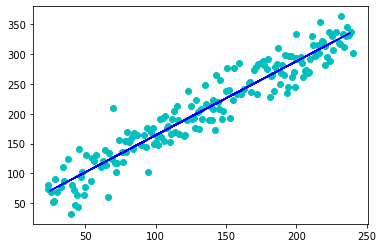

In [77]:
plt.scatter(X_train,y_train,color='c')
plt.plot(X_test,prediction,color='b')

<h2>Performance checking/ Evaluation</h2>

In [78]:
# using R squared method
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.9155104510685016

In [79]:
#Mean Error
print("Mean Error",np.mean(np.absolute(prediction-y_test)))

Mean Error 18.990840804604733


<H2>Deployment....test on unknown data</h2>

In [80]:
pred_new=result.predict([[55]])
pred_new

array([108.11664405])